In [21]:
import tensorflow as tf
import time
start = time.time() 

In [22]:
from tensorflow.examples.tutorials.mnist import input_data

In [23]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001FBE6E43DD8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001FBE6E43D30>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001FBE6E43D68>)

In [25]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [26]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [27]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [28]:
mnist.validation.images.shape

(5000, 784)

In [29]:
import numpy as np
from matplotlib import pyplot as plt

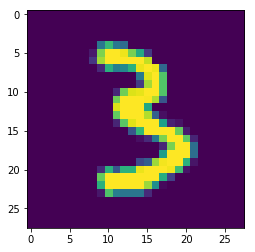

In [30]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [31]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[ 0.59596574  0.1919859   1.4559484  ... -1.3373692   1.3102047
   0.75299704]
 [ 0.38331375 -1.0392742  -0.42769924 ...  2.793643    0.76367325
   1.408531  ]
 [-2.10861    -1.3270593  -0.39068723 ...  0.49427038 -1.049554
  -0.93619984]
 ...
 [-0.25192788  2.3935697   1.490685   ...  0.20305724  1.01692
   0.24984066]
 [-0.66445625 -0.47511402 -0.53976405 ... -0.38979706  2.3401341
  -0.76998204]
 [-0.756826    0.84537095 -1.4957751  ... -1.4109207  -0.32795975
  -1.2259355 ]]


In [32]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [33]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]

In [34]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [35]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [36]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [38]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [39]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

27952.317087888718
4890.904397321618
2554.555369508508
1752.3449841011816
1356.4277075180148
1285.2303817240095
1074.897730132091
1026.9169343766637
863.5244320955197
718.5662445498327
685.1438525728527
625.2787483297084
452.2312271415717
478.426438029663
426.3899332185486
413.0686453512219
345.62024890036264
344.67073327382644
291.94144141180806
230.6821585664031
207.4039412922582
181.68298859185802
145.53387969074552
127.15855351635263
148.3410887310847


In [40]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()
print((time.time()-start)/60," mins")

1.6180889089902242  mins
